# Accounting fraud detection using Benford's law and other patterns of interest

In this notebook, I will show how the Python ecosystem can be used for accounting fraud detection using Benford's law and other patterns of interest.

In [1]:
# First import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

%matplotlib inline

## Accounting fraud detection using patterns of interest

Anomaly detection refers to the process of "searching for and identifying examples of atypical data in a dataset. These nonconforming cases are often referred to as *anomalies* or *outliers*. This process is often used in analyzing financial transactions to identify potential fraudulent activities and to trigger investigations." (Kelleher and Tierney, 2018, *Data Science*, p. 239). Anomaly detection does not necessarily involve a single or a few cases in a dataset, but can also involve a larger subset or even the overall pattern of the data. A good example that is regularly used for accounting fraud detection is what is known as Benford's law. As explained on Wikipedia, "Benford's law is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading digit is likely to be small. In sets that obey the law, the number 1 appears as the leading significant digit about 30% of the time, while 9 appears as the leading significant digit less than 5% of the time. If the digits were distributed uniformly, they would each occur about 11.1% of the time. Benford's law also makes predictions about the distribution of second digits, third digits, digit combinations, and so on." More specifically, Benford's Law is based on base-10 logarithms that show the probability that the leading digit(s) of a number will be n (i.e., P(n)) can be calculated as __log10(1+1/n)__.

In addition to Benford's law, which involves the frequency distribution of the first digit(s) in sets of numerical data, there can also be other patterns of interest, for example ones that involve the frequency distribution of the last digit(s) in sets of numerical data. That is, depending on the kind of operations and selling prices of a firm, one may have expections about the frequency distribution of the last digit(s) of (for instance) the sales revenue of individual transactions in a period. For example, given that a transaction at a supermarket typically involves multiple products and selling prices with different last digits, one may expect to find a uniform distribution when analyzing the frequency distribution of the last digit(s) of the sales revenue of all transactions in a period. On the other hand, given that a transaction at an electronics shop typically involves one product and selling prices with a 5 or 9 as the last digit, in such a firm, one may expect to find a different distribution when analyzing the frequency distribution of the last digit(s) of the sales revenue of all transactions in a period.

Below, I first provide code that can be used to analyze whether the frequency distribution of a variable is consistent with Benford's law or not, where I will first focus on the first digit, and then on the first two digits, of the values of this variable. Next, I provide code that can be used to analyze whether the frequency distribution of a variable is consistent with a uniform distribution or not, where I will focus on the last digit of the values of this variable. The dataset that I will analyze contains the expenditures (amounts) by employees of a small firm during the year 2020, and is an adjusted version of a dataset taken from Westland (2020, *Audit Analytics: Data Science for the Accounting Profession*).

## Importing and exploring the dataset

In [ ]:
# Import the data
df_exp = pd.read_csv('data/expenditures_adj.csv')
df_exp.head()

,exp_no,employee_no,date,amount
0,E00001,Emp0013,2020-01-03,586
1,E00002,Emp0016,2020-01-04,289
2,E00003,Emp0005,2020-01-05,73
3,E00004,Emp0004,2020-01-07,118
4,E00005,Emp0008,2020-01-07,97


In [3]:
# Display general information
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   exp_no       331 non-null    object
 1   employee_no  331 non-null    object
 2   date         331 non-null    object
 3   amount       331 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 10.5+ KB


In [4]:
# Display summary statistics
df_exp.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
amount,331.0,639.77,296.71,13.0,476.5,523.0,875.5,1602.0


## Analyzing consistency with Benford's law (first digit)

Let's now first analyze whether the frequency distribution of the 'amount' variable is consistent with Benford's law or not, when focussing on __the first digit__ of the values of this variable, both statistically and graphically.

In [ ]:
# Statistically analyze consistency with Benford's law (first digit)
obs = df_exp['amount']

#Create a list of the first two digits of the amounts
def first_digit(num):
    return int(str(num)[0])
obs = [first_digit(n) for n in obs]

#Create a dictionary with the observed frequencies (counts)
dict1 = {x: 0 for x in range(1, 10)}
for num in obs:
    dict1[num] += 1

#Calculate the number of observations and assign it to a variable
n = len(obs)

#Create a dictionary with the expected frequencies (also rounded)
dict2 = {x: n * math.log10(1+(1/x)) for x in range(1, 10)}
dict3 = {x: round(n * math.log10(1+(1/x)), 0) for x in range(1, 10)}

#Convert the dictionaries to lists
obs = list(dict1.values())
exp = list(dict2.values())
exp_rounded = list(dict3.values())
x = list(dict2.keys())

#Print the observed and expected frequencies
print(obs)
print(exp_rounded)

#Test for differences using the one-sample Chi-Square test
chi_sq = stats.chisquare(obs, f_exp=exp)
chi_sq_stat = (chi_sq[0].round(3))
chi_sq_pvalue = (("<0.01" if chi_sq[1] < 0.01 else chi_sq[1].round(3)))
print(f"one-sample Chi-Square test statistic = {chi_sq_stat}; p-value = {chi_sq_pvalue}")

[49, 13, 8, 95, 41, 20, 28, 32, 45]
[100.0, 58.0, 41.0, 32.0, 26.0, 22.0, 19.0, 17.0, 15.0]
one-sample Chi-Square test statistic = 297.85; p-value = <0.01


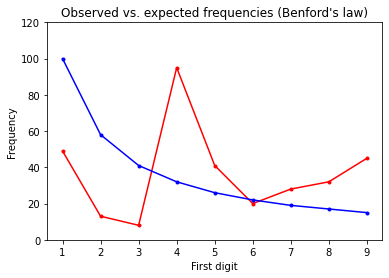

In [ ]:
# Graphically analyze consistency with Benford's law (first digit)
plt.plot(x, obs, c='r', marker= '.')
plt.plot(x, exp, c='b', marker= '.')
plt.ylim(0, 120)
plt.xlabel('First digit')
plt.ylabel('Frequency')
plt.title("Observed vs. expected frequencies (Benford's law)")
plt.show();

Based on these analyses, one can conclude that the frequency distribution of the 'amount' variable is not consistent with Benford's law, when focussing on the first digit of the values of this variable. The one-sample Chi-Square test indicates that the frequency distribution of the amounts is statistically significantly different from the frequency distribution that is consistent with Benford's law. The graph illustrates the difference, showing that the two distributions in particular deviate for the value 4. These findings may trigger a further investigation of these expenditures.

## Analyzing consistency with Benford's law (first two digits)

Let's now first analyze whether the frequency distribution of the 'amount' variable is consistent with Benford's law or not, when focussing on __the first two digits__ of the values of this variable, both statistically and graphically.

In [ ]:
# Statistically analyze consistency with Benford's law (first two digits)
obs = df_exp['amount']

#Create a list of the first two digits of the amounts
def first_two_digits(num):
    return int(str(num)[:2])
obs = [first_two_digits(n) for n in obs]

#Create a dictionary with the observed frequencies (counts)
dict1 = {x: 0 for x in range(10, 100)}
for num in obs:
    dict1[num] += 1

#Calculate the number of observations and assign it to a variable
n = len(obs)

#Create a dictionary with the expected frequencies (also rounded)
dict2 = {x: n * math.log10(1+(1/x)) for x in range(10, 100)}
dict3 = {x: round(n * math.log10(1+(1/x)), 0) for x in range(10, 100)}

#Convert the dictionaries to lists
obs = list(dict1.values())
exp = list(dict2.values())
exp_rounded = list(dict3.values())    ####
x = list(dict2.keys())

#Print the observed and expected frequencies
print(obs)
print(exp_rounded)

#Test for differences using the one-sample Chi-Square test
chi_sq = stats.chisquare(obs, f_exp=exp)
chi_sq_stat = (chi_sq[0].round(3))
chi_sq_pvalue = (("<0.01" if chi_sq[1] < 0.01 else chi_sq[1].round(3)))
print(f"one-sample Chi-Square test statistic = {chi_sq_stat}; p-value = {chi_sq_pvalue}")

[22, 9, 6, 6, 1, 0, 1, 0, 4, 0, 2, 1, 2, 0, 0, 1, 5, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 3, 0, 2, 0, 2, 3, 8, 16, 14, 23, 27, 17, 8, 5, 3, 2, 1, 1, 1, 3, 0, 2, 2, 1, 1, 2, 8, 0, 0, 3, 1, 3, 1, 2, 3, 2, 2, 2, 6, 4, 3, 3, 1, 5, 2, 1, 3, 6, 5, 2, 4, 4, 3, 3, 3, 6, 1, 6, 6, 6, 7]
[14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 9.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0]
one-sample Chi-Square test statistic = 821.267; p-value = <0.01


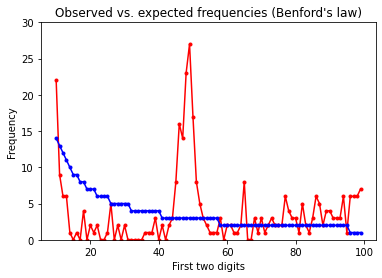

In [ ]:
# Graphically analyze consistency with Benford's law (first two digits)
plt.plot(x, obs, c='r', marker= '.')
plt.plot(x, exp, c='b', marker= '.')
plt.ylim(0, 30)
plt.xlabel('First two digits')
plt.ylabel('Frequency')
plt.title("Observed vs. expected frequencies (Benford's law)")
plt.show();

Based on these analyses, one can conclude that the frequency distribution of the 'amount' variable is not consistent with Benford's law, when focussing on the first two digits of the values of this variable. The one-sample Chi-Square test indicates that the frequency distribution of the amounts is statistically significantly different from the frequency distribution that is consistent with Benford's law. The graph illustrates the difference, showing that the two distributions in particular deviate for values around 50. These findings may trigger a further investigation of these expenditures.

## Analyzing consistency with uniform distribution (last digit)

Let's now analyze whether the frequency distribution of the 'amount' variable is consistent with a uniform distribution or not, when focussing on __the last digit__ of the values of this variable, both statistically and graphically.

In [9]:
# Statistically analyze consistency with uniform distribution (last digit)
obs = df_exp['amount']

#Create a list of the last digit of the amounts
obs = [num % 10 for num in obs]

#Create a dictionary with the observed frequencies (counts)
dict1 = {x: 0 for x in range(0, 10)}
for num in obs:
    dict1[num] += 1

#Calculate the number of observations and assign it to a variable
n = len(obs)

#Create a dictionary with the expected frequencies
dict2 = {x: round(n * 0.1, 1) for x in range(0, 10)}

#Convert the dictionaries to lists
obs = list(dict1.values())
exp = list(dict2.values())
x = list(dict1.keys())

#Print the observed and expected frequencies
print(obs)
print(exp)

#Test for differences using the one-sample Chi-Square test
chi_sq = stats.chisquare(obs, f_exp=exp)
chi_sq_stat = (chi_sq[0].round(3))
chi_sq_pvalue = (("<0.01" if chi_sq[1] < 0.01 else chi_sq[1].round(3)))
print(f"one-sample Chi-Square test statistic = {chi_sq_stat}; p-value = {chi_sq_pvalue}")

[37, 35, 35, 38, 29, 30, 27, 34, 36, 30]
[33.1, 33.1, 33.1, 33.1, 33.1, 33.1, 33.1, 33.1, 33.1, 33.1]
one-sample Chi-Square test statistic = 3.894; p-value = 0.918


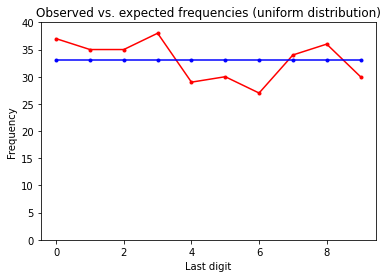

In [ ]:
# Graphically analyze consistency with uniform distribution (last digit)
plt.plot(x, obs, c='r', marker= '.')
plt.plot(x, exp, c='b', marker= '.')
plt.ylim(0, 40)
plt.xlabel('Last digit')
plt.ylabel('Frequency')
plt.title("Observed vs. expected frequencies (uniform distribution)")
plt.show();

Based on these analyses, one can conclude that the frequency distribution of the 'amount' variable is consistent with a uniform distribution, when focussing on the last digit of the values of this variable. The one-sample Chi-Square test indicates no statistically significant difference between the frequency distribution of the amounts and a uniform frequency distribution. The graph illustrates this further, by showing only small deviations between the two distributions.